## 0. Import Relevant Libraries

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import os


In [2]:
# ensure matplotlib plots appear inline in jupyter notebook
%matplotlib inline

In [3]:
import os
os.getcwd()

'C:\\Users\\Conor\\Documents\\Code Institute\\Capstone'

- Current working directory should read as 'C:\\Users\\Conor\\Documents\\Code Institute\\Capstone'

## 1. Load Data
- Loading cleaned data from previous two notebooks.

In [6]:
# Load cleaned data as df_raw
df_raw = pd.read_csv("/data/data_cleaned.csv")

In [7]:
# Copy df_raw to df to preserve raw data 
df = df_raw.copy()

## Feature Relationships

In [8]:
df.groupby('left_company')['job_level'].value_counts()

left_company  job_level
False         Mid          51379
              Entry         8496
              Manager       6455
              Senior        3386
              Lead          1605
True          Mid          20610
              Entry         3442
              Manager       2686
              Senior        1302
              Lead           639
Name: count, dtype: int64

In [9]:
df.head(1)

,employee_id,role,job_level,department,tenure_months,salary,performance_score,satisfaction_score,workload_score,team_sentiment,...,goal_achievement_rate,stress_level,burnout_risk,left_company,turnover_reason,risk_factors_summary,turnover_probability_generated,persona_name,role_complexity_score,career_progression_score
0,SYN_00354572,Manager,Manager,Operations,76,73344,0.597337,0.564479,0.600587,0.671515,...,0.597337,0.873155,0.8159,False,Not Applicable,Severe Burnout Risk,0.291812,QuietAchiever,0.2,0.915335


In [10]:
# Define Numeric Columns for correlation
numeric_cols = [
    'tenure_months',
    'salary',
    'performance_score',
    'satisfaction_score',
    'workload_score',
    'team_sentiment',
    'project_completion_rate',
    'overtime_hours',
    'training_participation',
    'collaboration_score',
    'email_sentiment',
    'slack_activity',
    'meeting_participation',
    'goal_achievement_rate',
    'stress_level',
    'burnout_risk',
    'career_progression_score'
]

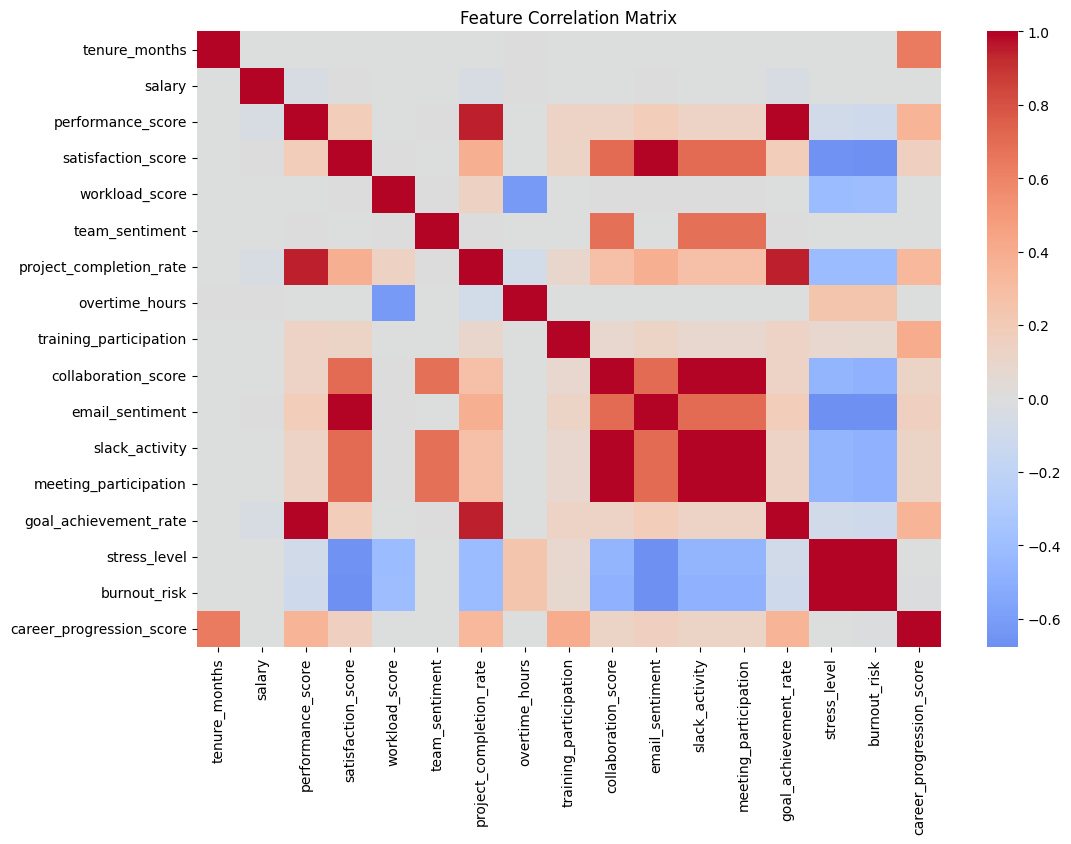

In [11]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

### Correlation findings
- 'meeting_participation', 'slack_activity', and 'collaboration_score' are all closely linked and clustered
- 'project_completion_rate', 'performance_score' and 'goal_achievement_rate' are closely linked and clustered
- 'stress_level' and 'burnout_risk' are closely linked and clustered
- 'satisfaction_score' and 'email_sentiment' are both strongly negatively correlated with 'stress_level' and 'burnout_risk', showing the links between low work satisfaction and negative email sentiment with high work stress and burnout risk.
- Interestingly, 'salary' and 'tenure_months' don't show any strong corrleation either way with other factors, suggesting that higher saleries or length in a job doesn't have an impact on job satisfaction, stress or burnout risk. 

In [12]:
# Check differences in numeric columns between those who left the company and those who remained. 
df.groupby('left_company')[numeric_cols].mean().T

left_company,False,True
tenure_months,70.257273,70.154678
salary,84610.789767,84625.646710
performance_score,0.694103,0.686206
satisfaction_score,0.602417,0.531451
workload_score,0.604970,0.588395
team_sentiment,0.668211,0.667147
project_completion_rate,0.601265,0.580845
overtime_hours,3.026807,3.349441
training_participation,0.279335,0.279187
collaboration_score,0.483977,0.449782


In [13]:
# Elucidate the difference
summary = df.groupby('left_company')[numeric_cols].mean().T
summary['difference (left - stayed)'] = summary[True] - summary[False]
summary.sort_values('difference (left - stayed)', ascending=False)

left_company,False,True,difference (left - stayed)
salary,84610.789767,84625.646710,14.856943
overtime_hours,3.026807,3.349441,0.322635
burnout_risk,0.710921,0.795825,0.084903
stress_level,0.770088,0.840597,0.070509
training_participation,0.279335,0.279187,-0.000148
team_sentiment,0.668211,0.667147,-0.001064
career_progression_score,0.841465,0.837911,-0.003553
goal_achievement_rate,0.694103,0.686206,-0.007898
performance_score,0.694103,0.686206,-0.007898
workload_score,0.604970,0.588395,-0.016575


In [14]:
# Due to different unit types (eg salary, 0-1 scales, months), standardising the difference between leavers and stayers.
means = df.groupby('left_company')[numeric_cols].mean().T
stds = df[numeric_cols].std()

means['std_diff'] = (means[True] - means[False]) / stds
means.sort_values('std_diff', ascending=False)


left_company,False,True,std_diff
burnout_risk,0.710921,0.795825,0.267988
stress_level,0.770088,0.840597,0.265369
overtime_hours,3.026807,3.349441,0.052941
salary,84610.789767,84625.646710,0.000313
training_participation,0.279335,0.279187,-0.000664
tenure_months,70.257273,70.154678,-0.002042
team_sentiment,0.668211,0.667147,-0.005992
career_progression_score,0.841465,0.837911,-0.019403
performance_score,0.694103,0.686206,-0.042885
goal_achievement_rate,0.694103,0.686206,-0.042885


Employees who left the company exhibited significantly higher stress and burnout risk, alongside lower satisfaction and engagement metrics (email sentiment, collaboration, meeting participation). Salary, tenure, and performance metrics showed minimal differences between leavers and stayers, suggesting turnover is primarily driven by wellbeing and engagement rather than compensation or capability.


In [15]:
persona_summary = (
    df
    .groupby('persona_name')
    .agg(
        left_rate=('left_company', 'mean'),   # % who left
        avg_stress=('stress_level', 'mean'),
        avg_satisfaction=('satisfaction_score', 'mean'),
        goal_achievement_rate=('goal_achievement_rate', 'mean'),
        tenure_months=('tenure_months', 'mean'),
        salary=('salary', 'mean')
    )
    .sort_values('left_rate', ascending=False)
)

persona_summary

,left_rate,avg_stress,avg_satisfaction,goal_achievement_rate,tenure_months,salary
persona_name,,,,,,
BurntOutStar,0.339206,1.000000,0.283061,0.540631,70.343921,83814.248139
StrugglingLearner,0.328973,0.954524,0.440924,0.369428,69.826810,92008.034913
ChangeResistor,0.310031,0.959904,0.501503,0.706207,69.281682,83715.947298
AmbitiousClimber,0.302186,0.888627,0.576450,0.840642,70.597045,84011.644847
OverachievingSprinter,0.299951,0.959934,0.647778,0.900534,70.054047,83890.481536
CorporateNavigator,0.289224,0.792035,0.594402,0.759586,71.082089,83801.357363
QuietAchiever,0.273336,0.694886,0.668025,0.822441,70.323416,84107.349324
NewEnthusiast,0.262368,0.722135,0.743896,0.615312,69.493862,83799.801984
9-to-5Clockwatcher,0.260927,0.627874,0.561555,0.649650,70.694035,83979.398937


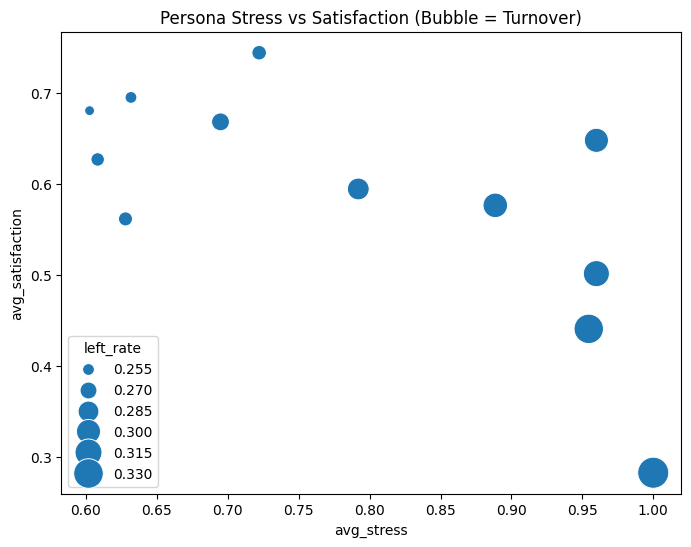

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=persona_summary,
    x='avg_stress',
    y='avg_satisfaction',
    size='left_rate',
    sizes=(50, 500)
)
plt.title('Persona Stress vs Satisfaction (Bubble = Turnover)')
plt.show()